# Face Verification

### 얼굴 인식에 영향을 주는 요소
- 이미지에 기인하는 요소 : 이미지 사이즈 / 이미지 조도 / 이미지 각도
- 사람에 기인하는 요소 : 표정 / 피부색 / 악세사리 착용여부

## 1. face_recognition

- 인기있는 API이지만 큰 개선 사항이 없고 상당히 오래된 얼굴 인식 모델을 사용
- 업데이트 중지된 오래된 모델
  - https://wiserloner.tistory.com/1123
- 참조 : https://github.com/ageitgey/face_recognition?ref=hackernoon.com

#### dlib
dlib 개요
- dlib는 얼굴영상에서 68개의 얼굴의 랜드마크 검출
- dlib 파일 다운로드 : https://pypi.org/project/dlib/
- 학습 데이터 모델 : http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2  

Visual Studio
- Visual Studio 다운로드 : https://visualstudio.microsoft.com/ko/downloads/
- 실행 후에 C++를 이용한 데스크톱 개발를 선택하고 오른쪽의 선택된 옵션 (옵션을 보면, Windows용 C++ CMake 도구 선택)을 install 버튼을 클릭하여 설치

In [ ]:
# !pip install cmake
# !pip install opencv-contrib-python dlib # 시간 오래걸림
# !pip install face_recognition

In [1]:
import cv2
import face_recognition as fr
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# 사진 로드 
card_img1 = cv2.imread("data/alchera/1/card.jpg")
card_img2 = cv2.imread('data/alchera/2/card.jpg')
card_img3 = cv2.imread('data/alchera/3/card.jpg')

# 색상 변환
card_img1 = cv2.cvtColor(card_img1, cv2.COLOR_BGR2RGB)
card_img2 = cv2.cvtColor(card_img2, cv2.COLOR_BGR2RGB)
card_img3 = cv2.cvtColor(card_img3, cv2.COLOR_BGR2RGB)

1번 신분증 얼굴 영역 : [(1390, 1241, 2055, 576), (1529, 3312, 1752, 3089)]
2번 신분증 얼굴 영역 : [(1035, 3129, 1589, 2575)]
3번 신분증 얼굴 영역 : [(1119, 2299, 1581, 1837)]


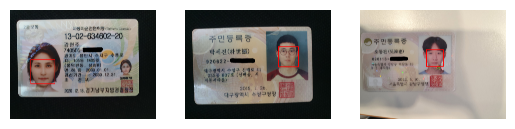

In [20]:
# 신분증 얼굴 영역 검출
card1 = fr.face_locations(card_img1)
card2 = fr.face_locations(card_img2)
card3 = fr.face_locations(card_img3)
print(F'1번 신분증 얼굴 영역 : {card1}')
print(F'2번 신분증 얼굴 영역 : {card2}')
print(F'3번 신분증 얼굴 영역 : {card3}')

# 신분증 얼굴 영역 네모 박스 그리기
cv2.rectangle(card_img1, (card1[0][3], card1[0][0]),
                     (card1[0][1], card1[0][2]),
                     (255, 0, 0), 20)  # (rgb코드), 두께

cv2.rectangle(card_img2, (card2[0][3], card2[0][0]),
                     (card2[0][1], card2[0][2]),
                     (255, 0, 0), 20)  

cv2.rectangle(card_img3, (card3[0][3], card3[0][0]),
                     (card3[0][1], card3[0][2]),
                     (255, 0, 0), 20)  

plt.subplot(1, 3, 1)
plt.imshow(card_img1)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(card_img2)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(card_img3)
plt.axis('off')
plt.show()


In [29]:
# 신분증 crop
card1_crop = card_img1[card1[0][0]:card1[0][2], card1[0][3]:card1[0][1]] 
card2_crop = card_img2[card2[0][0]:card2[0][2], card2[0][3]:card2[0][1]] 
card3_crop = card_img3[card3[0][0]:card3[0][2], card3[0][3]:card3[0][1]] 

# 신분증 얼굴 영역 특징 분석
encode_card1 = fr.face_encodings(card_img1)[0]
encode_card2 = fr.face_encodings(card_img2)[0]
encode_card3 = fr.face_encodings(card_img3)[0]

# crop한 신분증 얼굴 영역 특징 분석
encode_card1_crop = fr.face_encodings(card1_crop)[0]
encode_card2_crop = fr.face_encodings(card2_crop)[0]
encode_card3_crop = fr.face_encodings(card3_crop)[0]

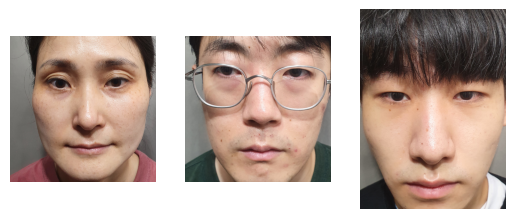

In [31]:
# 사진 로드 
face_img1 = cv2.imread("data/alchera/1/face.jpg")
face_img2 = cv2.imread("data/alchera/2/face.jpg")
face_img3 = cv2.imread("data/alchera/3/face.jpg")

# 사진 BGR을 RGB로 변경
face_img1 = cv2.cvtColor(face_img1, cv2.COLOR_BGR2RGB)
face_img2 = cv2.cvtColor(face_img2, cv2.COLOR_BGR2RGB)
face_img3 = cv2.cvtColor(face_img3, cv2.COLOR_BGR2RGB)

# 얼굴 영역 검출
face1 = fr.face_locations(face_img1)
face2 = fr.face_locations(face_img2)
face3 = fr.face_locations(face_img3)

# 얼굴 영역 crop
face1_crop = face_img1[face1[0][0]:face1[0][2], face1[0][3]:face1[0][1]]  # 슬라이싱으로 자르기
face2_crop = face_img2[face2[0][0]:face2[0][2], face2[0][3]:face2[0][1]] 
face3_crop = face_img3[face1[0][0]:face3[0][2], face3[0][3]:face3[0][1]] 

# crop 이미지 출력
plt.subplot(1, 3, 1)
plt.imshow(face1_crop)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(face2_crop)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(face3_crop)
plt.axis('off')


plt.show()


In [ ]:
# 얼굴 영역들의 특징 분석
encode_face1 = fr.face_encodings(face_img1)[0]
encode_face2 = fr.face_encodings(face_img2)[0]
encode_face3 = fr.face_encodings(face_img3)[0]

# crop 이미지 영역 특징 분석
encode_face1_crop = fr.face_encodings(face1_crop)[0]
encode_face2_crop = fr.face_encodings(face2_crop)[0]
encode_face3_crop = fr.face_encodings(face3_crop)[0]


In [32]:
# 얼굴 인식
result1 = fr.compare_faces([encode_face1], encode_card1)
result2 = fr.compare_faces([encode_face2], encode_card2)
result3 = fr.compare_faces([encode_face3], encode_card3)

print(f'얼굴 인식 결과 1번 : {result1}')
print(f'얼굴 인식 결과 2번 : {result2}')
print(f'얼굴 인식 결과 3번 : {result3}')

# Crop한 사진 얼굴 인식
result_crop1 = fr.compare_faces([encode_face1_crop], encode_card1_crop)
result_crop2 = fr.compare_faces([encode_face2_crop], encode_card2_crop)
result_crop3 = fr.compare_faces([encode_face3_crop], encode_card3_crop)

print(f'crop 얼굴 인식 결과 1번 : {result_crop1}')
print(f'crop 얼굴 인식 결과 2번 : {result_crop2}')
print(f'crop 얼굴 인식 결과 3번 : {result_crop3}')


얼굴 인식 결과 1번 : [True]
얼굴 인식 결과 2번 : [True]
얼굴 인식 결과 3번 : [True]
crop 얼굴 인식 결과 1번 : [True]
crop 얼굴 인식 결과 2번 : [True]
crop 얼굴 인식 결과 3번 : [True]


In [33]:
# 거리 분석 : 큰 값일 수록 불일치 (정확도 대신 거리로 측정)
dist1 = fr.face_distance([encode_face1], encode_card1)
dist2 = fr.face_distance([encode_face2], encode_card2)
dist3 = fr.face_distance([encode_face3], encode_card3)

print(f'1번 거리 : {dist1}')
print(f'2번 거리 : {dist2}')
print(f'3번 거리 : {dist3}')

dist1_crop = fr.face_distance([encode_face1_crop], encode_card1_crop)
dist2_crop = fr.face_distance([encode_face2_crop], encode_card2_crop)
dist3_crop = fr.face_distance([encode_face3_crop], encode_card3_crop)

print(f'crop 1번 거리 : {dist1_crop}')
print(f'crop 2번 거리 : {dist2_crop}')
print(f'crop 3번 거리 : {dist3_crop}')

# 임계값이 0.6정도 되는 듯

1번 거리 : [0.51022786]
2번 거리 : [0.57700717]
3번 거리 : [0.34808493]
crop 1번 거리 : [0.46046392]
crop 2번 거리 : [0.56856236]
crop 3번 거리 : [0.32025535]


### 테스트 결과

- 1:1 매칭이라서 얼굴 사진과 신분증 사진의 선후 문제는 영향을 주지 않았다.
- Crop : 일반 사진보다 얼굴 영역을 crop해서 인식한 결과 성능이 조금 더 개선 되었다.

#

## 2. Deepface
- 참조 : https://github.com/serengil/deepface?ref=hackernoon.com
- facebook에서 만듬
- FaceNet 및 InsightFace와 같은 다양한 얼굴 인식 방법을 지원
- Python 개발자라면 시작하기 쉽지만 다른 사람들이 통합하기 어려움 
- 다양한 얼굴 모델 사용 가능

#### FaceNet
- 구글에서 만듬
- 정확도가 매우 높은 API지만 개선이 없음
- 참조 :https://github.com/davidsandberg/facenet?ref=hackernoon.com

#### OpenFace

#### VGG-Face


In [5]:
# !pip install deepface

     ---------------------------------------- 49.6/49.6 kB ? eta 0:00:00
     ---------------------------------------- 79.5/79.5 kB 4.6 MB/s eta 0:00:00


In [6]:
from deepface import DeepFace

In [7]:
# 이미지 경로
face1_path = 'data/alchera/1/004_1_40_nom_41.jpg'
face2_path = 'data/alchera/2/005_1_20_gla_nob_41.jpg'
face3_path = 'data/alchera/3/007_1_20_ nob_41.jpg'

card1_path = 'data/alchera/1/004_card.jpg'
card2_path = 'data/alchera/2/005_card.jpg'
card3_path = 'data/alchera/3/007_card.jpg'

# 사용할 모델 종류
models = ['VGG-Face', "Facenet", "Facenet512", "OpenFace",
          "DeepFace", "DeepID", "ArcFace", "Dlib"]

# 평가 방법
metrics = ["cosine", "euclidean", "euclidean_12"]

In [9]:
# 두 얼굴쌍 비교
result1 = DeepFace.verify(img1_path=face1_path, img2_path=card1_path,
                          model_name=models[0],
                          distance_metric=metrics[1])
print(result1)
# threshold : distance 가 0.6 이하이면 동일인 취급을 하겠다.
# threshold는 평가 방법이 코사인인지 유클리드 거리인지에 따라서 임계 값이 다르다.

{'verified': True, 'distance': 0.5473371365016841, 'threshold': 0.6, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean', 'facial_areas': {'img1': {'x': 288, 'y': 812, 'w': 2413, 'h': 2413}, 'img2': {'x': 486, 'y': 1237, 'w': 858, 'h': 858}}, 'time': 3.45}


In [4]:
# 각 모델 불러오기
from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace
VGG_model = VGGFace.loadModel()  # input(224, 224, 3) -> output(1, 1, 2622)
Face_model = Facenet.loadModel()  # input(160, 160, 3) -> output(1, 1, 128)
Open_model = OpenFace.loadModel()  # input() -> output()
Fb_model = FbDeepFace.loadModel()  # input() -> output()

# 각 모델별 이상정인 Threshold
def findThreshold(model_name, distance_metric):
    threshold = 0
    if model_name == 'VGG-Face':
        threshold = 0.55
    elif model_name == 'OpenFace':
        threshold = 0.55
    elif model_name == 'Facenet':
        threshold = 10
    elif model_name == 'DeepFace':
        threshold = 64
    return threshold

VGGFace2_DeepFace_weights_val-0.9034.h5 will be downloaded...


Downloading...
From: https://github.com/swghosh/DeepFace/releases/download/weights-vggface2-2d-aligned/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
To: C:\Users\SY\.deepface\weights\VGGFace2_DeepFace_weights_val-0.9034.h5.zip
100%|██████████| 511M/511M [01:11<00:00, 7.18MB/s] 


### CompareFace

- REST API를 사용하면 사전 기계 학습 기술 없이도 시스템에 쉽게 통합 가능
- 확장 가능하므로 여러 비디오 스트림에서 얼굴을 동시에 인식 가능
- FaceNet과 InsightFace 선택 가능
- 현재 개발 중
- 참조 : https://github.com/exadel-inc/CompreFace

### InsightFace

- 얼굴 감지를 위해 가장 최근의 정확한 얼굴 인식 방법 중 하나
- LetinaFace 및 SubCenter-ArcFace를 지원
- 사용하기 쉽지 않다는 단점
- 참조 : https://github.com/deepinsight/insightface?ref=hackernoon.com

### InsightFace-REST

- 2021년부터 생성된 API로 인식속도 향상 버전
- 얼굴 임베딩만 제공하므로 분류기는 따로 만들어야 함
- 참조 : https://github.com/SthPhoenix/InsightFace-REST?ref=hackernoon.com